In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import keras
import matplotlib.pyplot as plt

Using TensorFlow backend.


First check whether in the data are nans

In [6]:
path_pilot = 'D:/ERAZER/Downloads/pilot.csv'
path_CB = 'D:/ERAZER/Downloads/CustomerBase.csv'
CB = pd.read_csv(path_CB)
pilot = pd.read_csv(path_pilot)
pilot.isna().sum()

V1           0
V2           0
V3           0
V4           0
V5           0
V6           0
V7           0
V8           0
V9           0
V10          0
V11          0
V12          0
V13          0
V14          0
V15          0
V16          0
V17          0
V18          0
V19          0
V20          0
treatment    0
purchase     0
dtype: int64

In [7]:
CB.isna().sum()

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
dtype: int64

In none of the data there are nans, hence there is no need to consider dealing with nans in this data preprocessing stage. Had there
been any nans, there are multiple approaches available, starting from altogether excluding the whole columns from the analysis in case
there is some threshold (say 10%) of nans in that column, for continuous data nans can be imputed with mean, median, mode, or analysied using Weight of evidence, 
and for categorical data, one could proceed using  weight of evidence for Nans. Another approach is dropping all rows with missing data

check whether there are columns that include only one or zero distinct values - then exclude that from analysis, 
as it brings no value at all

In [8]:
def exclude_data_few_unique_values(dataset):
    """drops columns that have either 0 distinct values (NANS) or only 1 distinct value"""
    col_to_drop = []

    for column in dataset.columns:
        if dataset[column].nunique() == 1 or dataset[column].nunique() == 0:
            col_to_drop.append(column)

    for column in col_to_drop:
        dataset = dataset.drop(columns=column)

    return dataset

In [9]:
pilot = exclude_data_few_unique_values(pilot)

In [10]:
# look into datatypes of columns
pilot.dtypes

V1           float64
V2            object
V3           float64
V4           float64
V5           float64
V6           float64
V7           float64
V8           float64
V9           float64
V10          float64
V11            int64
V12          float64
V13          float64
V14          float64
V15            int64
V16          float64
V17          float64
V18            int64
V19           object
V20          float64
treatment      int64
purchase       int64
dtype: object

In [11]:
# check how many unique values there are basing on dtypes

In [12]:
table_numerical = pilot[pilot.columns[[(pilot.dtypes.values == 'int64')[i] or (pilot.dtypes.values == 'float64')[i] for i in
 range(len(pilot.dtypes))]]]
table_numerical.nunique()

V1            690
V3            101
V4            101
V5           4236
V6            660
V7           1756
V8            101
V9            885
V10          1356
V11            29
V12          4566
V13           101
V14          1597
V15            21
V16           101
V17           784
V18             2
V20          2287
treatment       2
purchase        2
dtype: int64

In [13]:
pilot.V18.unique()

array([0, 1], dtype=int64)

In [14]:
pilot.V18.value_counts()

0    4859
1     141
Name: V18, dtype: int64

After a closer inspection of the column of data having only two distinct values, I decided to consider the columns V18 as categorical

In [15]:
# taking a look into data on whic predicitons need to be made
CB.dtypes

V1     float64
V2      object
V3     float64
V4     float64
V5     float64
V6     float64
V7     float64
V8     float64
V9     float64
V10    float64
V11      int64
V12    float64
V13    float64
V14    float64
V15      int64
V16    float64
V17    float64
V18      int64
V19     object
V20    float64
dtype: object

In [16]:
# looks the same as in the training (pilot) dataset. Now lets look at number of unique values for categorical variables

In [17]:
pilot.V2.nunique()

2

In [18]:
CB.V2.nunique()

2

In [19]:
pilot.V19.nunique()

18

In [20]:
CB.V19.nunique()

24

In [21]:
pilot.V19.value_counts()

A    1799
B    1141
C     728
D     465
E     293
F     208
G     120
H      91
I      55
J      37
K      17
L      16
M      10
O       8
N       7
R       2
P       2
T       1
Name: V19, dtype: int64

In [22]:
CB.V19.value_counts()

A    33993
B    21886
C    13964
D     8976
E     5834
F     3716
G     2347
H     1489
I     1008
J      621
K      412
L      266
M      174
N      111
O       74
P       45
Q       32
R       18
S       15
U        7
T        7
X        2
V        2
Z        1
Name: V19, dtype: int64

In column V19 the training and testing datasets differ significantly. With no explanation given as to how interpret changed number of classes, I will drop that column from analysis

Considering the distribution of data for the training and testing dataset, if they do not resemble each other, there is no point in including the different columns, or if all the columns have significantly different distributions, the modelling exercise makes no sense and needs to be abounded. 

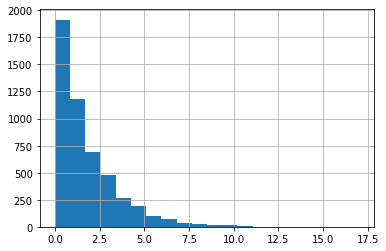

In [23]:
pilot.V1.hist(bins=20)

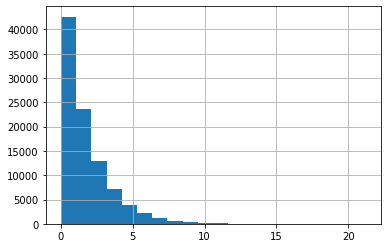

In [24]:
CB.V1.hist(bins=20)

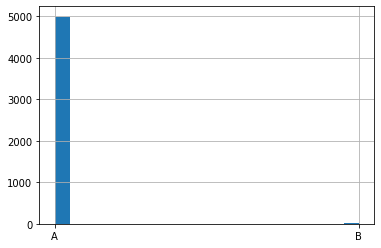

In [25]:
pilot.V2.hist(bins=20)

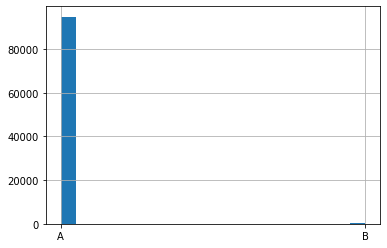

In [26]:
CB.V2.hist(bins=20)

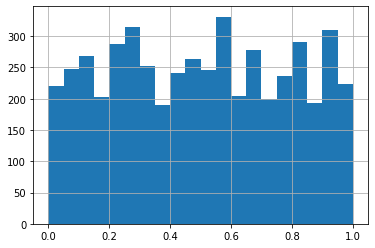

In [27]:
pilot.V3.hist(bins=20)

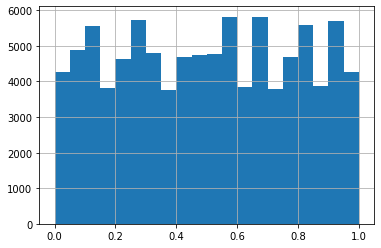

In [28]:
CB.V3.hist(bins=20)

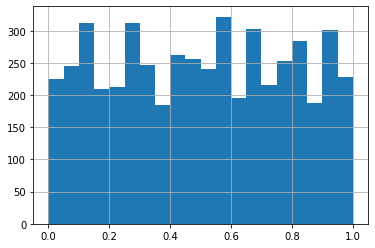

In [29]:
pilot.V4.hist(bins=20)

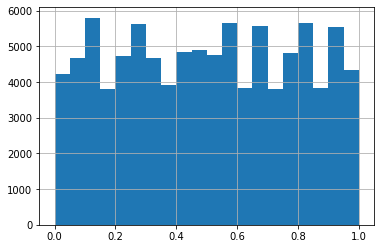

In [30]:
CB.V4.hist(bins=20)

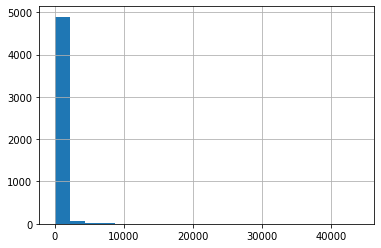

In [31]:
pilot.V5.hist(bins=20)

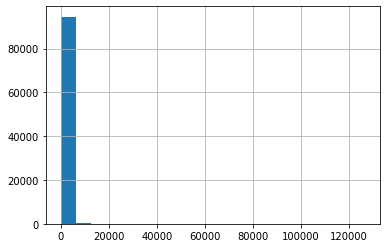

In [32]:
CB.V5.hist(bins=20)

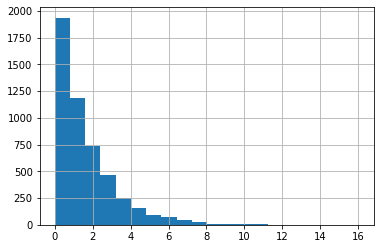

In [33]:
pilot.V6.hist(bins=20)

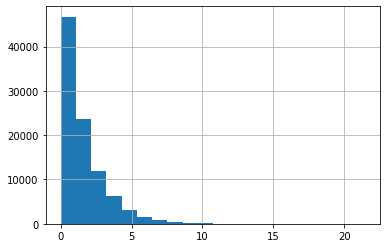

In [34]:
CB.V6.hist(bins=20)

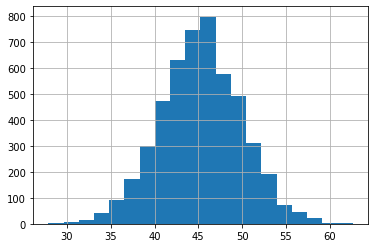

In [35]:
pilot.V7.hist(bins=20)

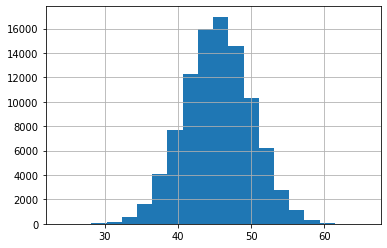

In [36]:
CB.V7.hist(bins=20)

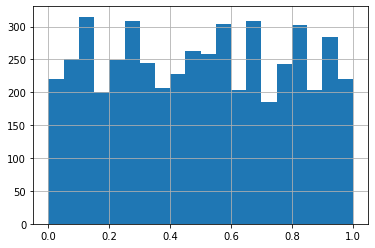

In [37]:
pilot.V8.hist(bins=20)

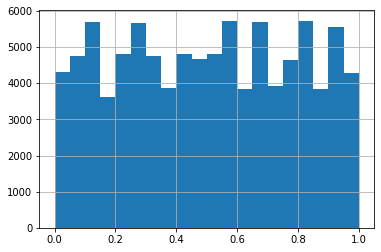

In [38]:
CB.V8.hist(bins=20)

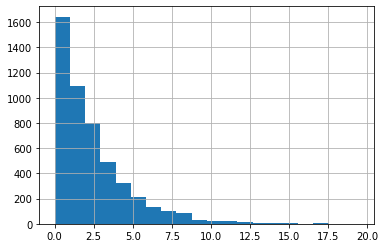

In [39]:
pilot.V9.hist(bins=20)

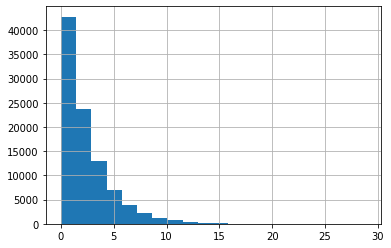

In [40]:
CB.V9.hist(bins=20)

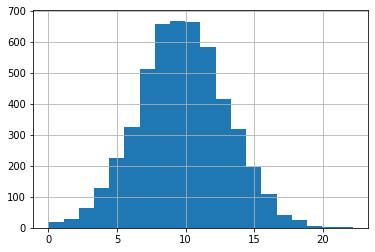

In [41]:
pilot.V10.hist(bins=20)

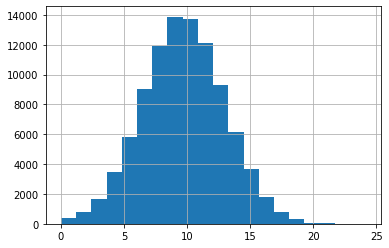

In [42]:
CB.V10.hist(bins=20)

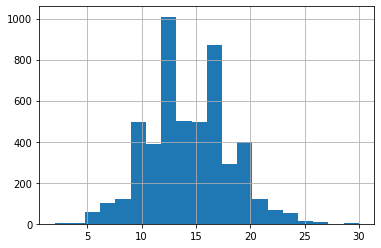

In [43]:
pilot.V11.hist(bins=20)

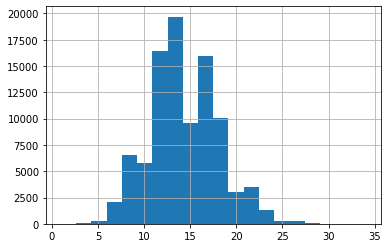

In [44]:
CB.V11.hist(bins=20)

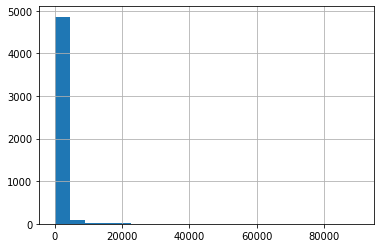

In [45]:
pilot.V12.hist(bins=20)

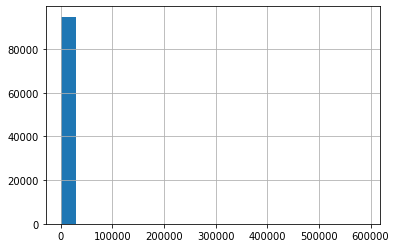

In [46]:
CB.V12.hist(bins=20)

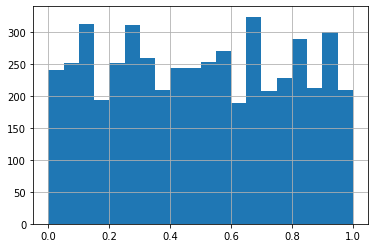

In [47]:
pilot.V13.hist(bins=20)

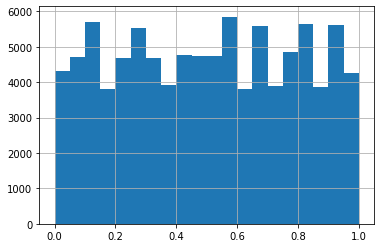

In [48]:
CB.V13.hist(bins=20)

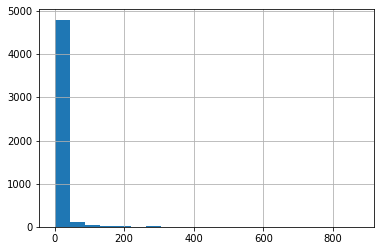

In [49]:
pilot.V14.hist(bins=20)

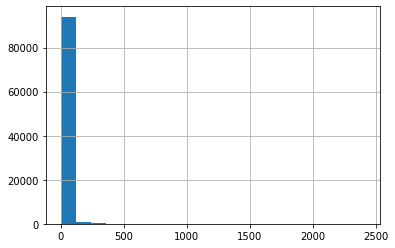

In [50]:
CB.V14.hist(bins=20)

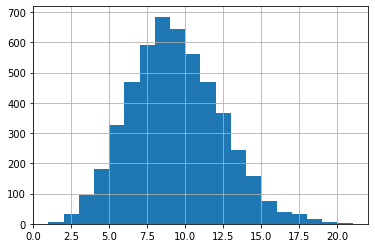

In [51]:
pilot.V15.hist(bins=20)

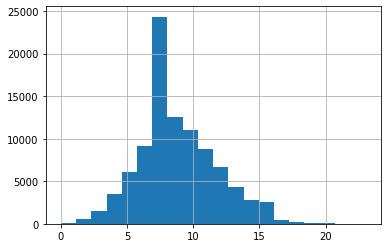

In [52]:
CB.V15.hist(bins=20)

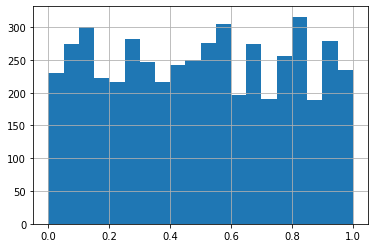

In [53]:
pilot.V16.hist(bins=20)

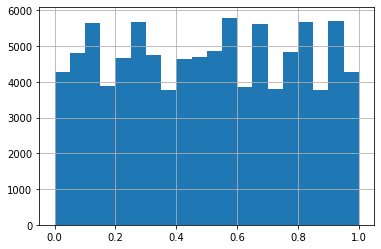

In [54]:
CB.V16.hist(bins=20)

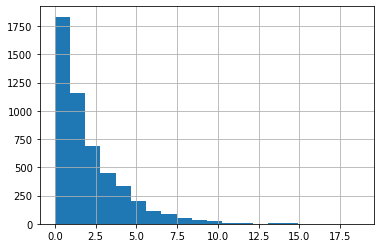

In [55]:
pilot.V17.hist(bins=20)

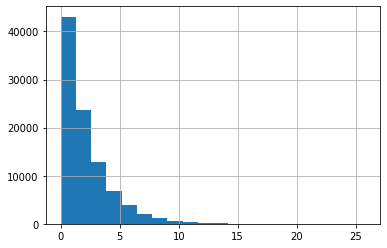

In [56]:
CB.V17.hist(bins=20)

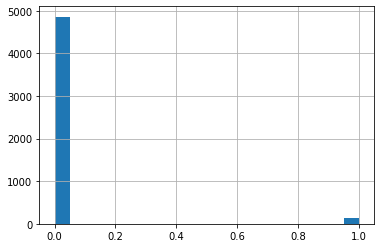

In [57]:
pilot.V18.hist(bins=20)

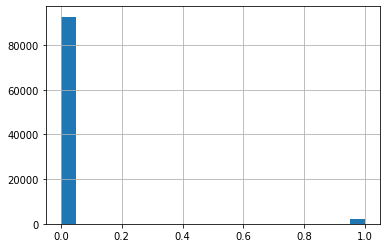

In [58]:
CB.V18.hist(bins=20)

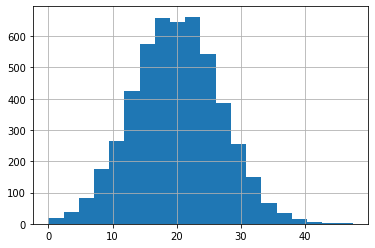

In [59]:
pilot.V20.hist(bins=20)

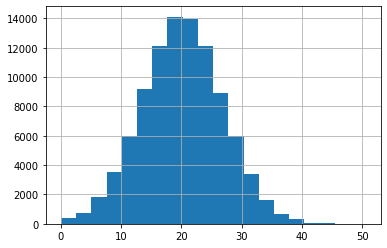

In [60]:
CB.V20.hist(bins=20)

For the purpose of the analysis, I consider presented distributions to be alike for both training and test data sets

I decided to split the dataset for numerical and categorical for further analysis

In [61]:
def split_dataset(table):
    # divide the table into one containing only numerical data and the other containing only categorical data, 
#     including comments above
    table_categorical = table[table.columns[table.dtypes.values == 'O']]
    table_numerical = table[table.columns[
        [(table.dtypes.values == 'int64')[i] or (table.dtypes.values == 'float64')[i] for i in
         range(len(table.dtypes))]]]
    table_categorical = pd.concat([table_categorical, table.V18], axis=1)
    table_categorical = table_categorical.drop(columns=['V19'])
#     table_numerical = pd.concat([table_numerical, table['V18']], axis=1)
    table_numerical = table_numerical.drop(columns=['purchase', 'treatment', 'V18'])
    return table_numerical, table_categorical

In [62]:
pilot_numerical, pilot_categorical = split_dataset(pilot)

In [63]:
pilot_numerical.shape

(5000, 17)

In [64]:
pilot_categorical.shape

(5000, 2)

As a method of dealing with categorical data, I will use one hot encoding, remembering about a so called "dummy variable trap" - to avoid making n columns out of n categorical variables - instead one of the columns should be dropped

In [65]:
def dummmies(pilot_categorical):
    """takes in a table with only categorical variables, and converts them to dummies, excluding one of the columns to
     avoid dummy-variable-trap"""
    for column in pilot_categorical.columns:
        new_columns = pd.get_dummies(pilot_categorical[column])
        new_columns = new_columns.drop(columns=[new_columns.columns.to_list()[-1]])  # drop the last column
        pilot_categorical = pd.concat([pilot_categorical, new_columns], axis=1)
        pilot_categorical = pilot_categorical.drop(columns=[column])
    return pilot_categorical

In [66]:
pilot_categorical = dummmies(pilot_categorical)

In [67]:
pilot_categorical.shape

(5000, 2)

In [68]:
pilot_categorical.columns = ['V2', 'V18']

In [69]:
pilot_categorical.head()

,V2,V18
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


It is a mistake to include in the analysis columns that are "overly" correlated with each other

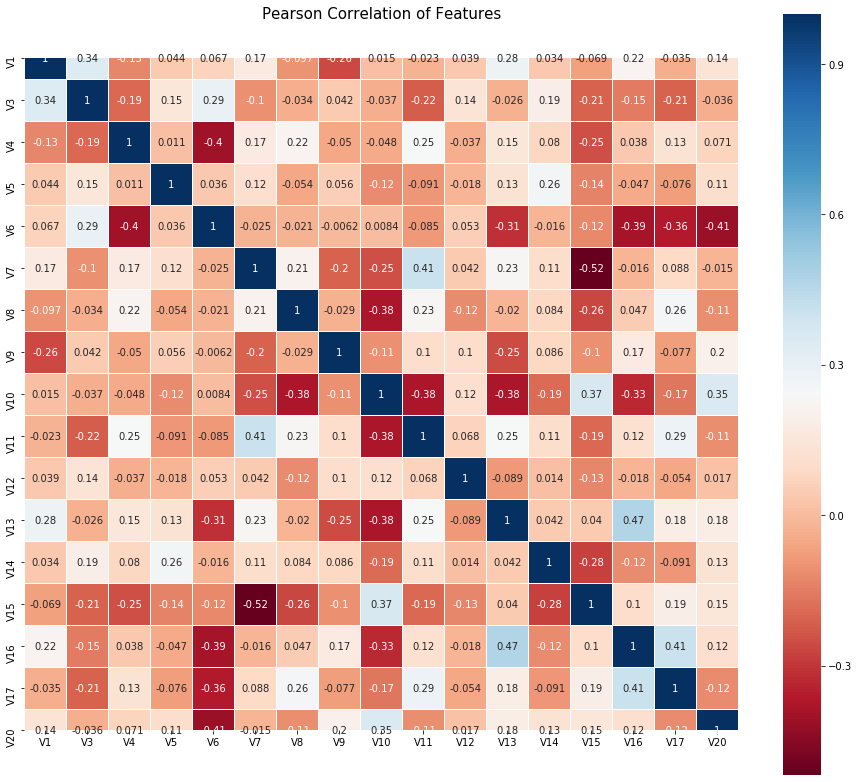

In [70]:
colormap = plt.cm.RdBu
plt.figure(figsize=(16, 14))

plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(pilot_numerical.astype(float).corr(), linewidths=0.1, vmax=1.0,
            square=True, cmap=colormap, linecolor='white', annot=True)

function for excluding overly correlated data

In [71]:
def correlation(dataset, threshold=0.7):
    # deals only with numeric data, float64 and int64

    col_corr = set()  # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname]  # deleting the column from the dataset

    return dataset


In [72]:
pilot_numerical = correlation(pilot_numerical)
pilot_numerical.shape

(5000, 17)

Assuming an arbitrarily selected threshold of correlated data at the level of threshold = 0.7 I conclude that there are no values to delete

There are 4 types of customers:

| treatment | purchase   |
|------|------|
|   0  | 0|
|   1  | 0|
|   0  | 1|
|   1  | 1|

I assume that if a client was contacted, and a client made a purchase it is only because they were contacted. Moreover, I assume that if I contact customers who were not contacted, contacting them does increase their chance of making a purchase. I will avoid contacting customers who are contacted and yet make no purchase, as it is very likely that contacting that group of customers brings only loss to the company.

In [73]:
def make_labels(treatment, purchase):
    labels = np.zeros(len(treatment))
    for idx in range(len(treatment)):
        if treatment[idx] == 0 and purchase[idx] == 0:
            pass  # for visibility and completeness
        if treatment[idx] == 1 and purchase[idx] == 0:
            labels[idx] = 1
        if treatment[idx] == 0 and purchase[idx] == 1:
            labels[idx] = 2
        if treatment[idx] == 1 and purchase[idx] == 1:
            labels[idx] = 3
    return labels


In [74]:
new_array = make_labels(pilot.treatment, pilot.purchase)
labels = pd.get_dummies(new_array)
labels.shape

(5000, 4)

another step in data preprocessing is standardizing all data

In [75]:
def standardize_data(table):
    """standardize test data the same as train data"""

    scaler = preprocessing.StandardScaler().fit(table)
    X_train_transformed = scaler.transform(table)

    return X_train_transformed

In [76]:
def split_dataset_validacja(table):
    # divide the table into one containing only numerical data and the other containing only categorical data
    table_categorical = table[table.columns[
        [(table.dtypes.values == 'int64')[i] or (table.dtypes.values == 'O')[i] for i in
         range(len(table.dtypes))]]]
    table_numerical = table[table.columns[table.dtypes.values == 'float64']]
    table_numerical = pd.concat([table_numerical, table['V11'], table['V15']], axis=1)
    table_categorical = table_categorical.drop(columns=['V11', 'V15', 'V19'])

    return table_numerical, table_categorical

# path_CB = 'D:/ERAZER/Downloads/CustomerBase.csv'
CB = pd.read_csv(path_CB)
CB = exclude_data_few_unique_values(CB)
# split
CB_numerical, CB_categorical = split_dataset_validacja(CB)
# get dummies for categorical
CB_categorical = dummmies(CB_categorical)
# not to overly correlated data
CB_numerical = correlation(CB_numerical)
CB_numerical.shape

(95000, 17)

In [77]:
CB_categorical.shape

(95000, 2)

In [78]:
from sklearn import preprocessing
pilot_numerical = standardize_data(pilot_numerical) 
CB_numerical = standardize_data(CB_numerical) 

In [79]:
CB_numerical.shape

(95000, 17)

defining architecture to make an embedding of categorical data and the nconcatenate with continuous data, as described here https://datascience.stackexchange.com/questions/29634/how-to-combine-categorical-and-continuous-input-features-for-neural-network-trai
Defining f1 metric, as a way to deal with imbalanced dataset, as presented below

In [80]:
labels.sum()

0.0    3688
1.0     895
2.0     315
3.0     102
dtype: int64

In [81]:
import keras
from keras.layers import Dense, Input, concatenate
from keras.models import Model
from keras.optimizers import Adam

from keras import backend as K


def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall


def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision


def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


def model_keras():
    input_categorical = Input(shape=(2,))
    inputs_continuous = Input(shape=(17,))

    # a layer instance is callable on a tensor, and returns a tensor
    output_categorical = Dense(8, name='categorical_dense_1')(input_categorical)
    output_categorical = keras.layers.ELU(alpha=1.0)(output_categorical)
    output_categorical = Dense(4, name='categorical_dense_2')(output_categorical)
    output_categorical = keras.layers.ELU(alpha=1.0)(output_categorical)

    output_continuous = Dense(64, name='continuous_dense_1')(inputs_continuous)
    output_continuous = keras.layers.ELU(alpha=1.0)(output_continuous)
    output_continuous = Dense(32, name='continuous_dense_2')(output_continuous)
    output_continuous = keras.layers.ELU(alpha=1.0)(output_continuous)

    concatenated = concatenate([output_categorical, output_continuous])

    concatenated = Dense(64)(concatenated)
    concatenated = keras.layers.ELU(alpha=1.0)(concatenated)
    concatenated = Dense(32)(concatenated)
    concatenated = keras.layers.ELU(alpha=1.0)(concatenated)
    concatenated = Dense(4, activation='softmax')(concatenated)

    model = Model(inputs=[input_categorical, inputs_continuous], outputs=concatenated)
    model.compile(optimizer=Adam(lr=0.01),
                  loss='categorical_crossentropy',
                  metrics=['accuracy', f1_m])
    model.summary()
    return model

In [82]:
logdir = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
model = model_keras()
model.fit([pilot_categorical, pilot_numerical], labels, epochs=100, validation_split=0.1, batch_size=128,
          callbacks=[tensorboard_callback])

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 2)            0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 17)           0                                            
__________________________________________________________________________________________________
categorical_dense_1 (Dense)     (None, 8)            24          input_1[0][0]                    
__________________________________________________________________________________________________
continuous_dense_1 (Dense)      (None, 64)           1152        input_2[0][0]                    
____________________________________________________________________________________________

Epoch 21/100
4500/4500 [==============================] - 0s 18us/step - loss: 0.6806 - accuracy: 0.7429 - f1_m: 0.7342 - val_loss: 0.8002 - val_accuracy: 0.7240 - val_f1_m: 0.7157
Epoch 22/100
4500/4500 [==============================] - 0s 17us/step - loss: 0.6683 - accuracy: 0.7449 - f1_m: 0.7410 - val_loss: 0.8634 - val_accuracy: 0.7180 - val_f1_m: 0.7214
Epoch 23/100
4500/4500 [==============================] - 0s 16us/step - loss: 0.6718 - accuracy: 0.7484 - f1_m: 0.7497 - val_loss: 0.8660 - val_accuracy: 0.7140 - val_f1_m: 0.7085
Epoch 24/100
4500/4500 [==============================] - 0s 17us/step - loss: 0.6583 - accuracy: 0.7502 - f1_m: 0.7446 - val_loss: 0.8837 - val_accuracy: 0.7060 - val_f1_m: 0.7031
Epoch 25/100
4500/4500 [==============================] - 0s 16us/step - loss: 0.6511 - accuracy: 0.7493 - f1_m: 0.7428 - val_loss: 0.9132 - val_accuracy: 0.7260 - val_f1_m: 0.7235
Epoch 26/100
4500/4500 [==============================] - 0s 16us/step - loss: 0.6479 - accurac

In [83]:
from tensorboard import notebook
%load_ext tensorboard
# %tensorboard --logdir logs
notebook.list() 
notebook.display(port=6006, height=1000) 

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Known TensorBoard instances:
  - port 6006: logdir logs (started 0:15:01 ago; pid 7160)
Selecting TensorBoard with logdir logs (started 0:15:01 ago; port 6006, pid 7160).


In [84]:
output = model.predict([CB_categorical, CB_numerical])

In [85]:
print('0:0\t=\t', (np.sum(np.argmax(output, axis=-1) == 0)))
print('1:0\t=\t', (np.sum(np.argmax(output, axis=-1) == 1)))
print('0:1\t=\t', (np.sum(np.argmax(output, axis=-1) == 2)))
print('1:1\t=\t', (np.sum(np.argmax(output, axis=-1) == 3)))

0:0	=	 76496
1:0	=	 11300
0:1	=	 5355
1:1	=	 1849


In [86]:
idx = np.argwhere(np.argmax(output, axis=-1) == 0)  # those who are 0:0
a = output[idx].squeeze()
np.array([np.argsort(a[i])[2] == 3 for i in range(len(a))]).sum() 


6109

That gives information how many of the clients who classify as 0:0 are the closest (their second prediction) to a group 1:1, and they should be contacted just after all 1:1 and 0:1 are already contacted.

In [87]:
subindeces_0 = [np.argsort(a[i])[2] == 3 for i in range(len(a))]

In [88]:
subindeces_0 = np.argwhere(subindeces_0)

In [89]:
index_class_0=[0]*95000
for i in range(len(subindeces_0)):
    index_class_0[idx[subindeces_0[i][0]][0]] = 1

In [90]:
sum(index_class_0)  # double - check

6109

In [91]:
index_class_3 = (np.argmax(output, axis=-1) == 3)
index_class_2 = (np.argmax(output, axis=-1) == 2)

In [92]:
call_keras_model = [0] * 95000
for i in range(95000):
    call_keras_model[i] = int(index_class_3[i]) + int(index_class_2[i]) + int(index_class_0[i])

In [93]:
len(call_keras_model), sum(call_keras_model)

(95000, 13313)

Limit of the call center is 23750 clients, hence in this case there is no need to consider the order of calling

In [94]:
df = pd.DataFrame(call_keras_model, columns=["decision"])
df.to_csv('decisions_keras_MLP.csv', index=False)

Trying a bagging algorithm, random forest

Looking for ways to optimize the performance of this classifier I resolved to tune hyperparameters using https://github.com/fmfn/BayesianOptimization library

In [95]:
from bayes_opt import BayesianOptimization
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [96]:
def bayesian_optimization(X_train, X_test, y_train, y_test, function, parameters):
    n_iterations = 10
    gp_params = {"alpha": 1e-4}
    BO = BayesianOptimization(function, parameters)
    BO.maximize(n_iter=n_iterations, **gp_params)

    return BO.max

In [97]:
def rfc_optimization(cv_splits):
    
    def function(n_estimators, max_depth, min_samples_split):
        
        return cross_val_score(
               RandomForestClassifier(
                   n_estimators=int(max(n_estimators,0)),                                                               
                   max_depth=int(max(max_depth,1)),
                   min_samples_split=int(max(min_samples_split,2)), 
                   n_jobs=-1, 
                   random_state=42,   
                   class_weight="balanced"),  
               X=X_train, 
               y=y_train, 
               cv=cv_splits,
               scoring="f1_macro",
               n_jobs=-1).mean()

    parameters = {"n_estimators": (10, 1000),
                  "max_depth": (1, 150),
                  "min_samples_split": (2, 10)}
    
    return function, parameters

In [98]:
#Train model
def train(X_train, y_train, X_test, y_test, function, parameters):
    cv_splits = 4
    
    best_solution = bayesian_optimization(X_train, y_train, X_test, y_test, function, parameters)      
    params = best_solution["params"]

    model = RandomForestClassifier(
             n_estimators=int(max(params["n_estimators"], 0)),
             max_depth=int(max(params["max_depth"], 1)),
             min_samples_split=int(max(params["min_samples_split"], 2)), 
             n_jobs=-1, 
             random_state=42,   
             class_weight="balanced")

    model.fit(X_train, y_train)
    
    return model

In [99]:
function, parameters = rfc_optimization(10)

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pd.concat([pd.DataFrame(pilot_numerical), pilot_categorical], axis=1), new_array, test_size=0.1, random_state=42)

In [101]:
train(X_train, y_train, X_test, y_test, function, parameters)

|   iter    |  target   | max_depth | min_sa... | n_esti... |
-------------------------------------------------------------
|  1        |  0.2252   |  71.36    |  5.067    |  801.0    |
|  2        |  0.2316   |  118.0    |  6.402    |  507.8    |
|  3        |  0.251    |  24.29    |  8.689    |  250.8    |
|  4        |  0.2301   |  73.19    |  6.74     |  665.0    |
|  5        |  0.2301   |  60.18    |  6.274    |  739.0    |
|  6        |  0.2848   |  149.5    |  9.55     |  10.77    |
|  7        |  0.2786   |  6.289    |  6.589    |  10.27    |
|  8        |  0.2758   |  148.3    |  7.787    |  10.42    |
|  9        |  0.1983   |  1.006    |  2.587    |  13.4     |
|  10       |  0.2342   |  149.3    |  3.649    |  13.28    |
|  11       |  0.201    |  1.0      |  10.0     |  1e+03    |
|  12       |  0.2424   |  149.3    |  4.451    |  12.35    |
|  13       |  0.2581   |  146.9    |  6.947    |  12.33    |
|  14       |  0.2458   |  149.9    |  4.428    |  13.01    |
|  15   

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=149, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [102]:
classifier = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

The above cell is a copy-paste version of the output from optimization of the model. Choosing class_weight='balanced' to change the weight assigned to different classes

In [103]:
classifier.fit(X_train, y_train)
print(classifier.score(X_test, y_test))

0.452


I do believe this result to be rather not satisfactory, given more time, I would definitely improve here. 

In [104]:
X_train.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 'V2', 'V18'], dtype='object')

In [105]:
to_predict = pd.concat([pd.DataFrame(CB_numerical), CB_categorical],axis=1)

In [106]:
# rename the columns
to_predict.columns = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 'V2', 'V18']

In [107]:
outcome_forest = classifier.predict_proba(to_predict)

In [108]:
print('0:0\t=\t', np.sum([np.argmax(outcome_forest[i])==0 for i in range(95000)]))


0:0	=	 48088


In [109]:
print('1:0\t=\t', np.sum([np.argmax(outcome_forest[i])==1 for i in range(95000)]))

1:0	=	 26119


In [110]:
print('0:1\t=\t', np.sum([np.argmax(outcome_forest[i])==2 for i in range(95000)]))

0:1	=	 16375


In [111]:
print('1:1\t=\t', np.sum([np.argmax(outcome_forest[i])==3 for i in range(95000)]))

1:1	=	 4418


See how many values were predicted as the 0, 1, 2 and 3. As before target those from class 0 (0 - 0) who were second close to being class 3 (1 - 1), as that increases the chances that they will make a purchase.

In [112]:
# get indices of class 0
idx_0 = np.argwhere([np.argmax(outcome_forest[i])==0 for i in range(95000)]) 

In [113]:
idx_0.shape
a = output[idx_0].squeeze()
np.array([np.argsort(a[i])[2] == 3 for i in range(len(a))]).sum() 

3519

In [114]:
# check how many of class 0 are close to veing classified as class 3
np.array([np.argsort(a[i])[2] == 3 for i in range(len(a))]).sum() 

3519

Now make the prediction which customers should be contacted in the form requested. Customers from classes 3, 2 and part of class 0 should be contacted.

In [115]:
class_3_indexes = [np.argmax(outcome_forest[i])==3 for i in range(95000)]

In [116]:
class_2_indexes = [np.argmax(outcome_forest[i])==2 for i in range(95000)]

In [117]:
part_of_class0_indices = [np.argsort(a[i])[2] == 3 for i in range(len(a))]

In [118]:
np.sum(part_of_class0_indices)  # double - check

3519

In [119]:
len(part_of_class0_indices)

48088

In [120]:
ind = np.argwhere(part_of_class0_indices) 

In [121]:
class_0_indexes=95000 * [0]
for i in range(len(ind)):
    class_0_indexes[idx_0[ind[i][0]][0]] = 1

In [122]:
np.sum(class_0_indexes)

3519

In [123]:
call = [0] * 95000
for i in range(95000):
    call[i] = int(class_3_indexes[i]) + int(class_2_indexes[i]) + int(class_0_indexes[i])

In [124]:
len(call), sum(call)

(95000, 24312)

In [125]:
sum(class_3_indexes), sum(class_2_indexes)

(4418, 16375)

Limit of the call center is 23750 clients, hence in this case there might be a need to consider the order of calling. First call class 3 and class 2 and the ncall remaining part of class 0

In [126]:
flag=False
if sum(call) > 0.25*95000:
    flag=True
    remaining_to_call = 23750 - (sum(class_3_indexes)+ sum(class_2_indexes))
    print('remaining to call:\t',23750 - (sum(class_3_indexes)+ sum(class_2_indexes)))

remaining to call:	 2957


In [127]:
if flag:
    call_corrected = [0] * 95000
    for i in range(95000):
        call_corrected[i] = int(class_3_indexes[i]) + int(class_2_indexes[i])
    called_from_class_0 = 0
    i = 0
    while called_from_class_0 < remaining_to_call:
        call_corrected[i] = call_corrected[i] + int(class_0_indexes[i])
        called_from_class_0+=int(class_0_indexes[i])
        i+=1

In [128]:
if flag:
    sum(call_corrected)

call - gives information which customers should be called, as they are most likely to be perpetuated to make a purchase because contacted

In [129]:
if flag:
    df = pd.DataFrame(call_corrected, columns=["decision"])
    df.to_csv('decisions_random_forest.csv', index=False)
else:
    df = pd.DataFrame(call, columns=["decision"])
    df.to_csv('decisions_random_forest.csv', index=False)

The output of this code are two .csv files (decisions_random_forest.csv and decisions_keras_MLP.csv) with binary indications which clients hsould be called. As indicated in the instruction I have not spent too much time fine tuning the model - it is the part I would definitely spend some additional time if that were the objective of this excercise. During the process I found a Bayesian optimization package, which I would also happily explore more to find proper parameters for Random Forest. Similarly, I would rather have fine tuned the neural net architecture using one of AutoML algorithm, rather than hand-picking the hyperparameters.